In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
to_categorical = tf.keras.utils.to_categorical
Sequential = tf.keras.models.Sequential
Conv2D = tf.keras.layers.Conv2D
MaxPool2D = tf.keras.layers.MaxPool2D
Dense = tf.keras.layers.Dense
Flatten = tf.keras.layers.Flatten
Dropout = tf.keras.layers.Dropout
Model = tf.keras.models.Model
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
Input = tf.keras.layers.Input

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# 第一种API搭建模型
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

W0814 20:55:55.119949 140517071824704 deprecation.py:506] From /home/mao/.virtualenvs/tf1/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# 第二种API搭建模型
inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

W0814 20:58:02.887716 139939582940992 deprecation.py:506] From /home/mao/.virtualenvs/tf1/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [8]:
datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

In [9]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                              validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//batch_size)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3320 - acc: 0.8948 - val_loss: 0.0425 - val_acc: 0.9866
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1151 - acc: 0.9669 - val_loss: 0.0231 - val_acc: 0.9927
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0926 - acc: 0.9744 - val_loss: 0.0267 - val_acc: 0.9916
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0780 - acc: 0.9777 - val_loss: 0.0220 - val_acc: 0.9934
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0691 - acc: 0.9800 - val_loss: 0.0213 - val_acc: 0.9934
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0676 - acc: 0.9814 - val_loss: 0.0172 - val_acc: 0.9953
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0604 - acc: 0.9830 - val_loss: 0.0176 - val_acc: 0.9938
Epoch 8/10
1875/1875 [==============================] -

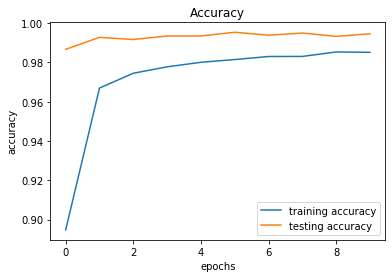

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

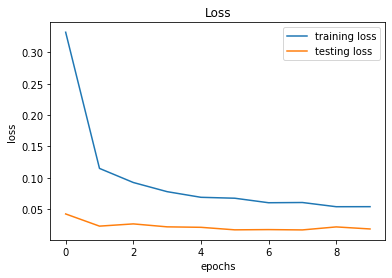

In [11]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()